<a href="https://colab.research.google.com/github/JYP97/DS2_Proj_Jobs_skills_analysis/blob/master/ds2_job_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Google's logo](https://dss.fosterwebmarketing.com/upload/514/Skills_Knowledge_Abilities.jpeg)
# Job Skills Analysis

#Data Preprocessing
###1. get rid of data points with NaN skill (and other features that we want to use)
###2. split skills
###3. remove redundant columns
###4. Find duplicated skills(same or similar job title with different skills, salary, experiences, etc.)

   Roughly truncate dataset -> 4k~5k random sample

   Manual/Automatic annotation of skills ontology with the help of ESCO

   Truncate dataset with more balanced samples -> 2k~3k

In [ ]:
# import packages
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import os
import pandas as pd 
from sklearn.preprocessing import StandardScaler
import sklearn as skl
import itertools
import nltk
import re

In [ ]:
# import data from google drive
from google.colab import drive
drive.mount('/content/drive')
# Importing the dataset
df = pd.read_json('/content/drive/MyDrive/DS2/dataset.json')


#jiayu
#df = pd.read_json('/content/drive/MyDrive/DS2/dataset.json')

print("Shape of Dataset: " + str(df.shape))
df.head()

Mounted at /content/drive
Shape of Dataset: (10501, 21)


,salary,domain,education,crawled_at,description,title,skills,country,raw_description,locality,...,longitude,postalCode,url,experience,address,latitude,_id,company,region,employment_type
0,$17.23 - $22.00 / hour,https://www.careerbuilder.com/,Bachelor's Degree,2021-05-05 03:01:49,Job Description\nTo implement the Head Start P...,Head Start Teacher,Emergency Handling,US,\n\n<strong>Job Description</strong>\n<span>To...,Rochester,...,-77.59785,14604,https://www.careerbuilder.com/job/J8S02F6YRMG5...,1 to 2 years experience.,550 East Main Street,43.15929,2b387592-8148-5720-a661-a2730061d14c,"Action for a Better Community, Inc.",NY,FULL_TIME
1,$19.00 - $26.00 / hour,https://www.careerbuilder.com/,Graduate Degree,2021-05-05 03:01:50,Job Description\nYou have the magic. We have t...,Teacher of English for Online Groups!,"Vocabularies, Grammars, Teaching, Lesson Plann...",US,\n\n<strong>Job Description</strong>\n<p style...,Atlanta,...,-84.38799,,https://www.careerbuilder.com/job/JCL1H264YM6F...,No experience required.,,33.74900,cfc728ee-e7f8-5538-b1ee-0f6a2d12e1d1,Magic Ears,GA,PART_TIME
2,"$106,250.00 - $125,000.00 / year",https://www.careerbuilder.com/,Bachelor's Degree,2021-05-05 03:01:50,Job Description\nWe are looking for a CRM deve...,CRM / PHP Developer,"PHP (Scripting Language), Debugging, Web Servi...",US,\n\n<strong>Job Description</strong>\n<p class...,Duluth,...,-84.17516,30097,https://www.careerbuilder.com/job/JCM4J76JP92B...,At least 5 years experience.,,34.04884,8dcd846b-db99-547f-836c-bcda497cff0d,ExecuSource,GA,FULL_TIME
3,,https://www.careerbuilder.com/,High School,2021-05-05 03:01:50,Job Description\n\nBriggs Dodge Ram Fiat is lo...,Automotive Service Advisor / Driver,"Driving, Service Delivery, Customer Service, A...",US,\n\n<strong>Job Description</strong>\n<p style...,Topeka,...,-95.68294,66611,https://www.careerbuilder.com/job/JCH4GH71PST9...,No experience required.,3001 South Kansas Avenue,39.01264,e7fc9e40-ac86-5cf2-ba8f-3c1ef9e21982,Briggs Dodge Ram Fiat,KS,FULL_TIME
4,"$85,000.00 - $120,000.00 / year",https://www.careerbuilder.com/,4 Year Degree,2021-05-05 03:01:50,"Job Description\n HARLINGEN, TX- RIO GRANDE VA...",Licensed Nursing Home Administrator,"Emergency Handling, Training, Accounting, Heal...",US,\n\n<strong>Job Description</strong>\n<p style...,Harlingen,...,-97.65767,78550,https://www.careerbuilder.com/job/JCM2C66SCC02...,At least 3 years experience.,1814 Atrium Place Drive,26.16793,0d4d608a-17c0-5e6b-827e-88ad505cad09,Regency Integrated Health Services,TX,FULL_TIME


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# delete unnecessary columns
drop = ['domain', 'crawled_at', 'url', 'country', 'locality', '_id', 'postalCode', 'region', 'raw_description', 'latitude', 'address', 'company', 'longitude', 'posted_at']
for item in drop:
  del df[item]
display(df)

,salary,education,description,title,skills,experience,employment_type
0,$17.23 - $22.00 / hour,Bachelor's Degree,Job Description\nTo implement the Head Start P...,Head Start Teacher,Emergency Handling,1 to 2 years experience.,FULL_TIME
1,$19.00 - $26.00 / hour,Graduate Degree,Job Description\nYou have the magic. We have t...,Teacher of English for Online Groups!,"Vocabularies, Grammars, Teaching, Lesson Plann...",No experience required.,PART_TIME
2,"$106,250.00 - $125,000.00 / year",Bachelor's Degree,Job Description\nWe are looking for a CRM deve...,CRM / PHP Developer,"PHP (Scripting Language), Debugging, Web Servi...",At least 5 years experience.,FULL_TIME
3,,High School,Job Description\n\nBriggs Dodge Ram Fiat is lo...,Automotive Service Advisor / Driver,"Driving, Service Delivery, Customer Service, A...",No experience required.,FULL_TIME
4,"$85,000.00 - $120,000.00 / year",4 Year Degree,"Job Description\n HARLINGEN, TX- RIO GRANDE VA...",Licensed Nursing Home Administrator,"Emergency Handling, Training, Accounting, Heal...",At least 3 years experience.,FULL_TIME
...,...,...,...,...,...,...,...
10496,,4 Year Degree,"Job Description\n Location: Troy, MI/ Remote ...",Network Administrator,"Storage (Computing), Networking, Maintenance, ...",At least 6 years experience.,FULL_TIME
10497,$18.00/ hour,,Job Description\n Beaverton - FT - LDSP - Sun...,Lead Direct Support Professional - LDSP,"Developmental Disabilities, Intellectual Disab...",At least 2 years experience.,FULL_TIME
10498,$14.00/ hour,High School,Job Description\n If you are looking for a car...,Student Dorm Advisor,,At least 1 year experience.,FULL_TIME
10499,,,Job Description\n\n\n\nYou would need your lif...,Life Insurance Sales Position,"Life Insurance, Insurance, Success Driven, Mor...",,FULL_TIME


In [ ]:
# cleaning data with ''
df_new = df[df['education'] != '']
display(df_new)

,salary,education,description,title,skills,experience,employment_type
0,$17.23 - $22.00 / hour,Bachelor's Degree,Job Description\nTo implement the Head Start P...,Head Start Teacher,Emergency Handling,1 to 2 years experience.,FULL_TIME
1,$19.00 - $26.00 / hour,Graduate Degree,Job Description\nYou have the magic. We have t...,Teacher of English for Online Groups!,"Vocabularies, Grammars, Teaching, Lesson Plann...",No experience required.,PART_TIME
2,"$106,250.00 - $125,000.00 / year",Bachelor's Degree,Job Description\nWe are looking for a CRM deve...,CRM / PHP Developer,"PHP (Scripting Language), Debugging, Web Servi...",At least 5 years experience.,FULL_TIME
3,,High School,Job Description\n\nBriggs Dodge Ram Fiat is lo...,Automotive Service Advisor / Driver,"Driving, Service Delivery, Customer Service, A...",No experience required.,FULL_TIME
4,"$85,000.00 - $120,000.00 / year",4 Year Degree,"Job Description\n HARLINGEN, TX- RIO GRANDE VA...",Licensed Nursing Home Administrator,"Emergency Handling, Training, Accounting, Heal...",At least 3 years experience.,FULL_TIME
...,...,...,...,...,...,...,...
10492,,Graduate Degree,Job Description\n\n Albertina Kerr empowers...,Clinical Supervisor,"Mental Health, Family Therapy, Licensed Clinic...",At least 2 years experience.,FULL_TIME
10494,"$80,000.00/ year",High School,Job Description\n Automotive Technicians / Ma...,Automotive Technicians / Master Level Technicians,"Diagnostic Tools, Steering, Brakes, Suspension...",,FULL_TIME
10495,"$100,000.00 - $150,000.00 / year",4 Year Degree,Job Description\n IT Compliance Director will ...,IT Compliance Director,"Risk Analysis, Auditing, Certified Information...",At least 5 years experience.,FULL_TIME
10496,,4 Year Degree,"Job Description\n Location: Troy, MI/ Remote ...",Network Administrator,"Storage (Computing), Networking, Maintenance, ...",At least 6 years experience.,FULL_TIME


#Process of EDA

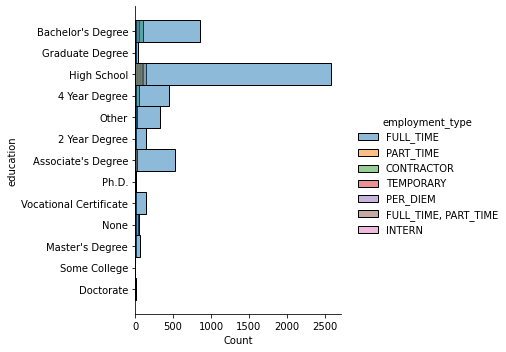

In [ ]:
# plots of education information
edu_plot = sns.displot(
    data=df_new, y="education", hue="employment_type", kind='hist'
)


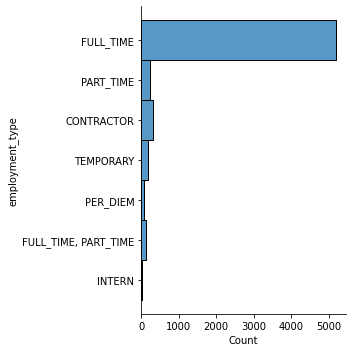

In [ ]:
# distribution of employment type
sns.displot(
    data=df_new, y="employment_type", kind='hist'
)

4713
[2503, 2070, 1949, 1670, 1560, 1555, 1202, 1062, 881, 876, 842, 840, 839, 829, 814, 765, 756, 737, 728, 712, 679, 673, 667, 664, 619, 612, 607, 606, 595, 575, 559, 538, 528, 518, 500, 477, 477, 474, 466, 459, 454, 453, 453, 443, 441, 387, 377, 372, 370, 361, 350, 343, 335, 334, 331, 330, 329, 312, 299, 298]
['Scheduling', 'Communication', 'Customer Service', 'Sales', 'Management', 'Training', 'Hardworking And Dedicated', 'Complex Problem Solving', 'Operations', 'Attention To Detail', 'Self Motivation', 'Coordinating', 'Leadership', 'Maintenance', 'Merchandising', 'Retailing', 'Health Care', 'Reports', '', 'Finance', 'Testing', 'Recruitment', 'Team-working', 'Nursing', 'Information Security', 'Microsoft Excel', 'English Language', 'Verbal Communication', 'Trustworthy', 'Administration', 'Registered Nurse Certified', 'Accounting', 'Unloading', 'Warehousing', 'Decision Making', 'Multitasking', 'Analysis', 'Basic Life Support', 'Passionate', 'Driving', 'Learning', 'Marketing', 'Docume

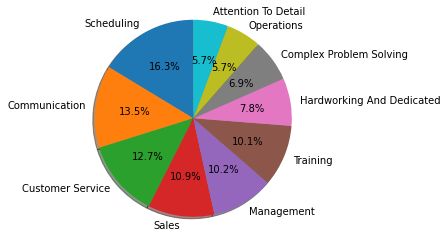

In [ ]:
# string parsing of job skills
skills = []
for description in df['skills']:
  skill_list = description.split(', ')
  skills.append(skill_list)

flat_list = list(itertools.chain(*skills))

tmp = flat_list
tmp = list(dict.fromkeys(tmp))
print(len(tmp))
pd.DataFrame(tmp).to_csv('/content/drive/MyDrive/DS2/skill_list.csv')

from collections import Counter
c = Counter(flat_list)
most_60 = c.most_common(60)
most_10 = c.most_common(10)
counts = []
labels = []
counts_10 = []
labels_10 = []
for item in most_60:
  counts.append(item[1])
  labels.append(item[0])
for item in most_10:
  counts_10.append(item[1])
  labels_10.append(item[0])
print(counts)
print(labels)
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
fig1, ax1 = plt.subplots()
ax1.pie(counts_10, labels=labels_10, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('popular_skills')
plt.show()


['1', '2', '5', '3', '1', '2', '2', '5', '2', '5', '9', '5', '1', '1', '3', '2', '5', '2', '2', '4', '1', '1', '1', '2', '5', '3', '1', '3', '2', '2', '5', '1', '2', '2', '4', '1', '10', '2', '1', '2', '5', '3', '2', '15', '2', '2', '1', '2', '1', '12', '2', '3', '5', '3', '15', '1', '7', '5', '7', '3', '3', '5', '1', '4', '3', '2', '5', '2', '3', '5', '1', '2', '3', '2', '5', '2', '3', '4', '6', '3', '4', '3', '2', '2', '2', '5', '1', '5', '1', '2', '2', '3', '1', '1', '1', '2', '2', '5', '12', '3', '7', '5', '1', '3', '2', '2', '1', '2', '1', '1', '5', '1', '8', '2', '7', '3', '1', '5', '1', '1', '5', '2', '1', '2', '1', '3', '5', '2', '3', '7', '7', '3', '2', '2', '5', '1', '2', '1', '3', '2', '5', '3', '1', '1', '1', '2', '2', '2', '1', '3', '3', '1', '1', '2', '1', '2', '2', '5', '1', '2', '2', '2', '1', '10', '2', '1', '10', '3', '5', '2', '1', '1', '1', '2', '1', '1', '10', '1', '10', '2', '3', '3', '1', '2', '2', '15', '10', '3', '1', '1', '2', '10', '1', '1', '2', '4', '1', '3

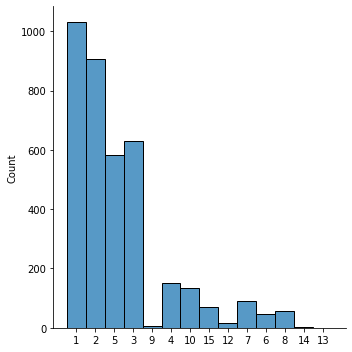

In [ ]:
# experience requirment
experience = df_new['experience']
years = []
for item in experience:
  for x in item.split(" "):
    if x.isdigit():
      years.append(x)
print(years)

sns.displot(
    years, kind='hist'
)


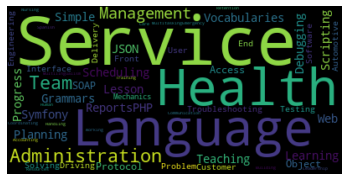

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# Create and generate a word cloud image:
words = df_new.skills[1] + df_new.skills[2] + df_new.skills[3] + df_new.skills[4]
wordcloud = WordCloud().generate(words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('word_cloud')
plt.show()


[17.23, 22.0, 19.0, 26.0, 106250.0, 125000.0, 85000.0, 120000.0, 53041.0, 120750.0, 65000.0, 120000.0, 45600.0, 53000.0, 85000.0, 146100.0, 80000.0, 150000.0, 65.0, 70.0, 15.0, 17.75, 33010.0, 35880.0, 90075.0, 120000.0, 20.0, 25.0, 40000.0, 46000.0, 80000.0, 450000.0, 97500.0, 112500.0, 62000.0, 75000.0, 35000.0, 63400.0, 401.0, 11.43, 150000.0, 22.0, 24.0, 35.0, 41.0, 120000.0, 140000.0, 14.0, 16.0, 15.0, 0.0, 16.75, 15.5, 16.5, 80000.0, 90000.0, 17.0, 18.0, 35.0, 58.17, 75000.0, 85000.0, 50000.0, 70000.0, 15.0, 20.0, 15.5, 17.05, 14.0, 15.0, 18.25, 70000.0, 78000.0, 70000.0, 95000.0, 14.0, 960000.0, 999999.0, 65000.0, 90000.0, 0.0, 17.0, 53000.0, 57000.0, 13.0, 57720.0, 75920.0, 13.0, 35000.0, 45000.0, 40000.0, 45000.0, 0.0, 18.0, 0.0, 70000.0, 76280.0, 146538.0, 63.56, 62.0, 67.0, 40000.0, 50000.0, 50000.0, 75000.0, 15.0, 100000.0, 150000.0, 16000.0, 22.5, 27.5, 21.0, 26.0, 30000.0, 300000.0, 40000.0, 45000.0, 15.0, 16.0, 120000.0, 140000.0, 175000.0, 200000.0, 20.9, 24.2, 401.0, 1

{'whiskers': [<matplotlib.lines.Line2D at 0x7efca9d2e610>,
 'caps': [<matplotlib.lines.Line2D at 0x7efca9d2ecd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7efca9d2e2b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7efca9d333d0>],
 'fliers': [],
 'means': []}

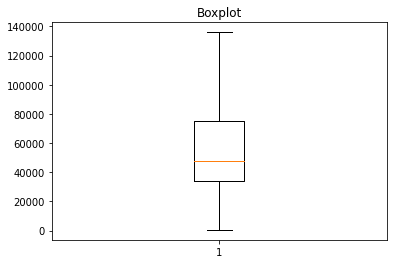

In [ ]:
from tables.utils import list_logged_instances
# box plot of salary analysis
import re

salary = df_new['salary']
salaries = []
for item in salary:
  split = re.findall(r"\d+\,?\d+\.?\d*",str(item))
  if len(split) != 0:
   salaries.append(split)
flat_list_salaries = list(itertools.chain(*salaries))
new_list = []

# substitute ',' with ''
for item in flat_list_salaries:
    new_list.append(re.sub(',', '', str(item)))
list_salary = []


# string to int
for item in new_list:
  list_salary.append(float(item))
# print(list_salary)

salary_year = []
for item in list_salary:
  if item < 100 and item != 0:
    salary_year.append(item * 2000)
  else:
    if item != 0 and item < 600000:
      salary_year.append(item)
print(list_salary)
fig4, ax4 = plt.subplots()
ax4.set_title('Boxplot')
ax4.boxplot(salary_year, showfliers=False)


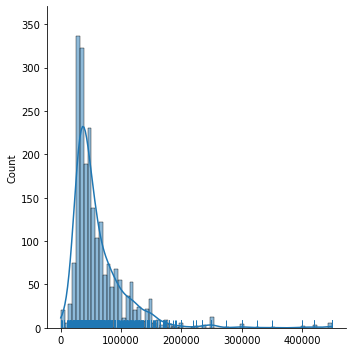

In [ ]:
# kde plot using seaborn displot()
sns.displot(salary_year, kde = True, rug = True)

In [ ]:
# job title
cleaed_title = ['title', 'skills']
for item in cleaed_title:
  df_new = df_new[df_new[item] != '']
df_new = df_new.drop_duplicate()

df_cleaned = df_new.reset_index(drop=True)
# del df_cleaned['index']
df_cleaned

AttributeError: ignored

In [ ]:
df_cleaned.to_csv('/content/drive/MyDrive/DS2/clean_dataset.csv') 